StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.
We are going to study a sample dataset from StreetEasy with 5000 rental listings in Manhattan,Queens and Brooklyn with multiple linear
regression to find out what are the factors affecting an apartment's rent price.

Multiple Linear Regression uses two or more independant variables to predict the value of the dependant variable.
It is based on the following equation:
y = b + m1*x1 + m2*x2 + ... + mn*xn
where y is the dependant variable which we are aiming to predict, [x1,...,xn] are the n independant variables which we 
assume would affect the value of y, [m1,...,mn] are the coefficients which measure the contribution of each 
independant variables, whereas b is the intercept of the model.

In [47]:
#import the modules we're going to use in the project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [24]:
#import the StreetEasy dataset as a Data Frame
df = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')

In [25]:
#check the top rows of the DF
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [56]:
#seperate the dataset into subsets by borough
df_manhattan = df[df['borough']=='Manhattan']
df_brooklyn = df[df['borough']=='Brooklyn']
df_queens = df[df['borough']=='Queens']
dfs = [df,df_manhattan,df_brooklyn,df_queens]

Investigate the correlations between rent and other factors in different borough using pandas .corr() method
And visualize with seaborn heatmap 

# I'd like to plot plots with for loop, but not knowing how to set figure cloth. need to dig into it.
for df_ in dfs:
    sns.set(rc={'figure.figsize':(15,10)})
    sns.heatmap(df_.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

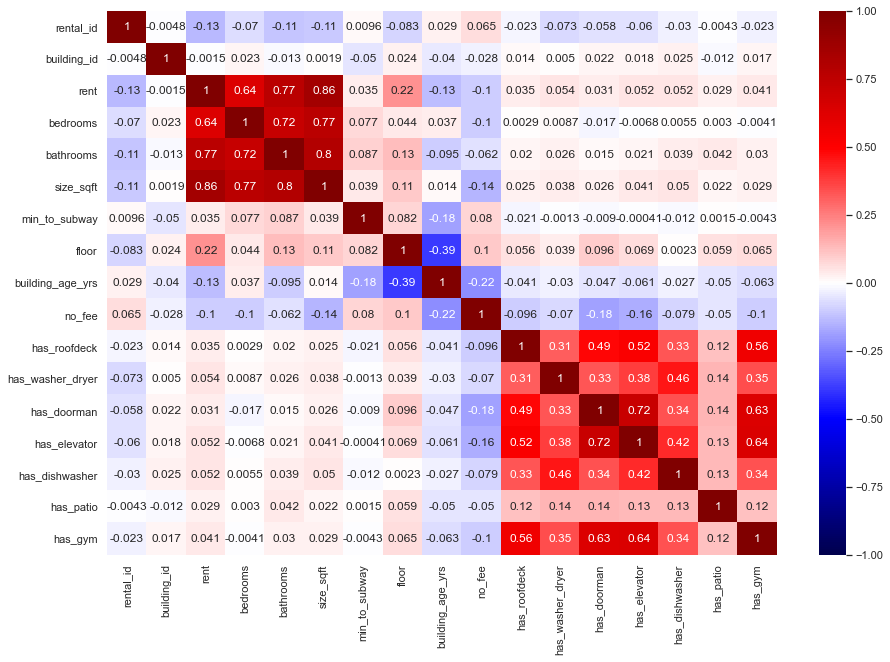

In [54]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_manhattan.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

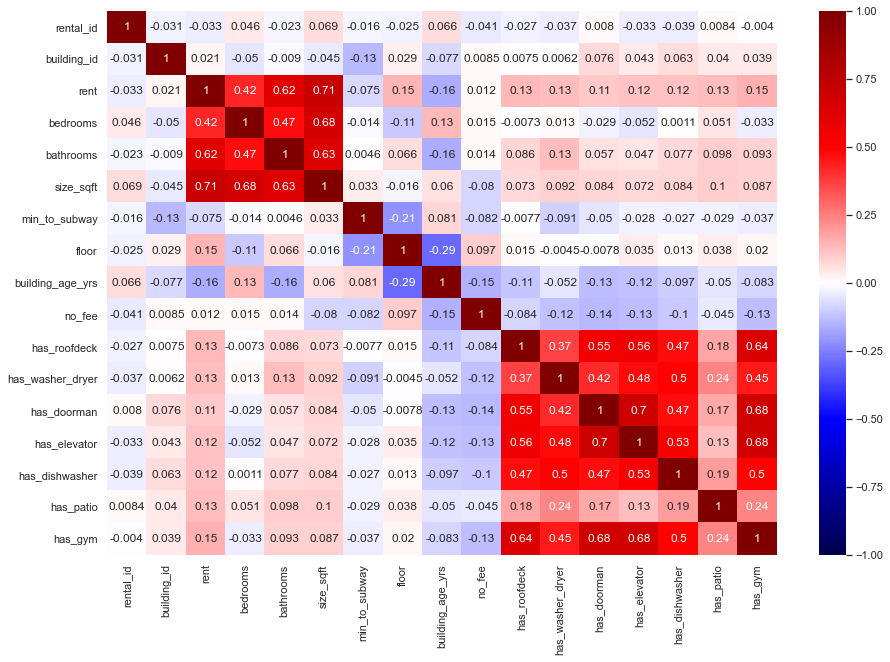

In [59]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_brooklyn.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

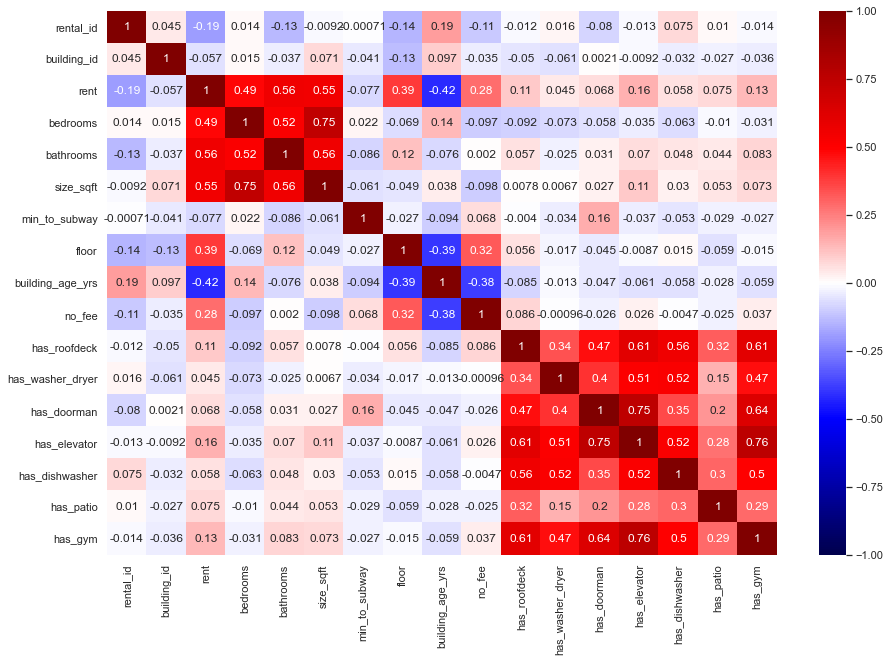

In [64]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_queens.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

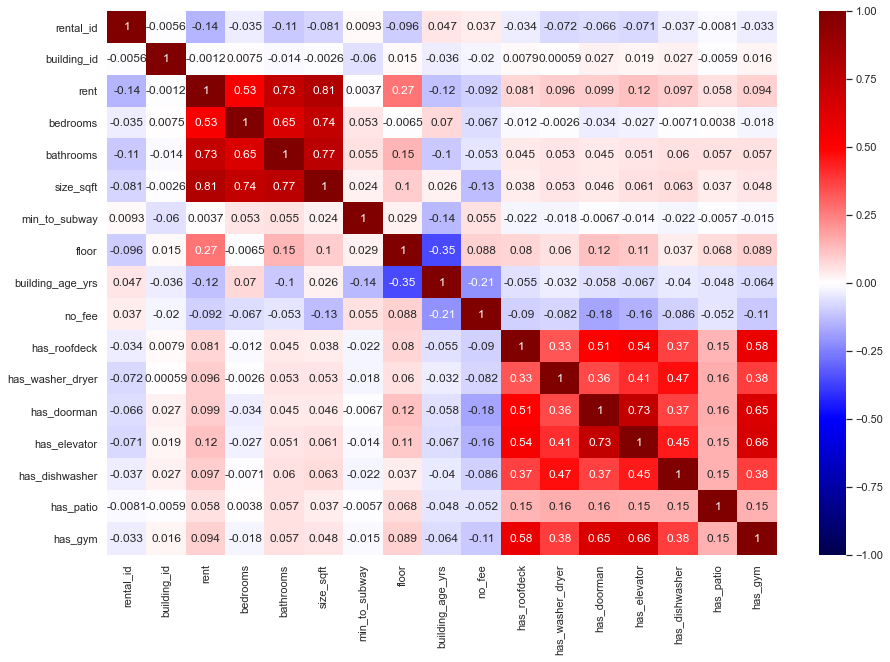

In [74]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

In [66]:
df_manhattan.corr()['rent']

rental_id          -0.134347
building_id        -0.001533
rent                1.000000
bedrooms            0.638336
bathrooms           0.769474
size_sqft           0.857954
min_to_subway       0.035164
floor               0.215867
building_age_yrs   -0.128895
no_fee             -0.101497
has_roofdeck        0.035165
has_washer_dryer    0.053873
has_doorman         0.031302
has_elevator        0.051860
has_dishwasher      0.052241
has_patio           0.029302
has_gym             0.040609
Name: rent, dtype: float64

In [67]:
df_brooklyn.corr()['rent']

rental_id          -0.033474
building_id         0.020729
rent                1.000000
bedrooms            0.423325
bathrooms           0.623439
size_sqft           0.711931
min_to_subway      -0.074794
floor               0.147078
building_age_yrs   -0.161548
no_fee              0.011937
has_roofdeck        0.134062
has_washer_dryer    0.131607
has_doorman         0.106982
has_elevator        0.124215
has_dishwasher      0.119386
has_patio           0.127789
has_gym             0.150871
Name: rent, dtype: float64

In [68]:
df_queens.corr()['rent']

rental_id          -0.193360
building_id        -0.056973
rent                1.000000
bedrooms            0.485529
bathrooms           0.559759
size_sqft           0.548668
min_to_subway      -0.076548
floor               0.387964
building_age_yrs   -0.417359
no_fee              0.284298
has_roofdeck        0.106541
has_washer_dryer    0.045068
has_doorman         0.068435
has_elevator        0.156086
has_dishwasher      0.057593
has_patio           0.074720
has_gym             0.132922
Name: rent, dtype: float64

In [69]:
df.corr()['rent']

rental_id          -0.142801
building_id        -0.001235
rent                1.000000
bedrooms            0.531200
bathrooms           0.733644
size_sqft           0.808784
min_to_subway       0.003652
floor               0.272351
building_age_yrs   -0.122302
no_fee             -0.091769
has_roofdeck        0.081286
has_washer_dryer    0.096136
has_doorman         0.099106
has_elevator        0.120822
has_dishwasher      0.096631
has_patio           0.058260
has_gym             0.093737
Name: rent, dtype: float64

In [ ]:
From the 'rent' row or column of the above heatmap, we can tell that, the 'rent' value is highly correlated with the
'bedrooms','bathrooms' and 'size_sqft' columns.
We'll build up a multi linear regression model with these 3 variables as our independent variable, to predict the rent
price.

In [27]:
df.columns.values[3:17]

array(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'], dtype=object)

In [34]:
#create the dataframes that we're going to use for the regression model:
independent_vars = df.columns.values[3:17]
x = df[independent_vars]
y = df[['rent']]

Train Set vs Test Set:

As with most machine learning algorithms, the first step for setting up the model is to split the data set into:
    Train Set: the data used to fit the model 
    Test Set: the data partitioned away at the very beginning of the experiment, so as to provide an unbiased 
        evaluation of the model.
In general, putting 80% of the dataset into the Train Set and the rest 20% of the dataset into the Test Set would be 
a good start.
We'll use the train_test_split function from the sklearn.model_selection model to implement this operation.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [30]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [32]:
mlr.coef_


array([[-475.2889333 , 1328.22567917,    4.73306933,  -18.11429085,
          38.87600152,   -3.9229693 ,  -90.43059454,   36.52632761,
         152.24687339,   16.71971096,  212.96289828,  -20.87925978,
         -54.53722001,  -73.572695  ]])

In [33]:
mlr.intercept_

array([-1043.30744662])

In [35]:
print(independent_vars)

['bedrooms' 'bathrooms' 'size_sqft' 'min_to_subway' 'floor'
 'building_age_yrs' 'no_fee' 'has_roofdeck' 'has_washer_dryer'
 'has_doorman' 'has_elevator' 'has_dishwasher' 'has_patio' 'has_gym']


problems with the regression results and potential reason:
    coefficient for number of bedrooms is negative, which is conterintuition;
    coefficient for size_sqft is only 4.7, which seems quite irrelavant given this is the smallest coefficiency number,
    that's mainly because size_sqft has large value compared with other independent variables.
To further dig whether we should include a variable in the interpretation model, we'll plot the scatter plot for each
variable and rent.

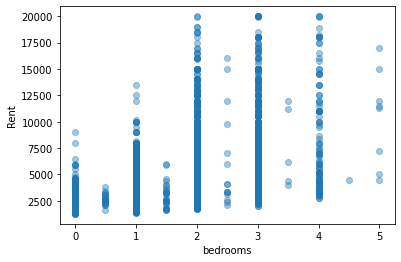

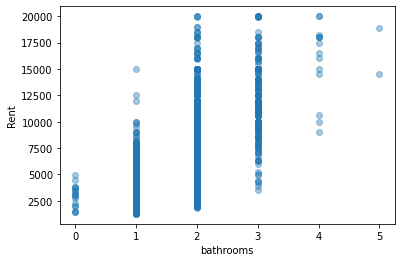

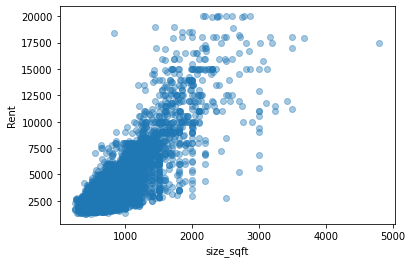

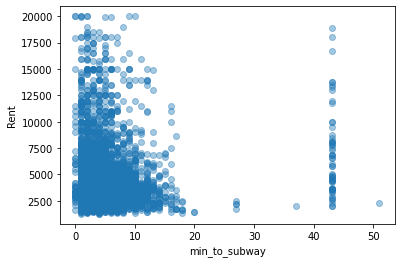

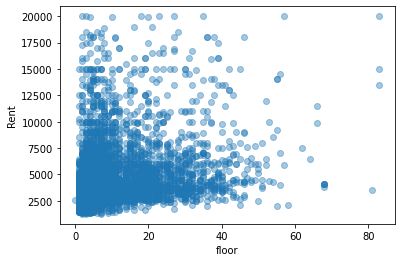

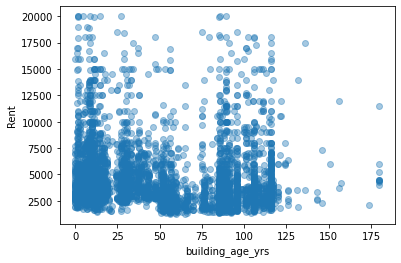

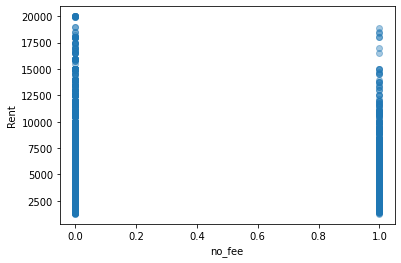

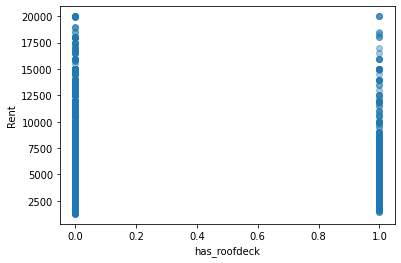

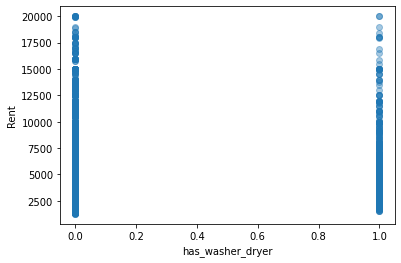

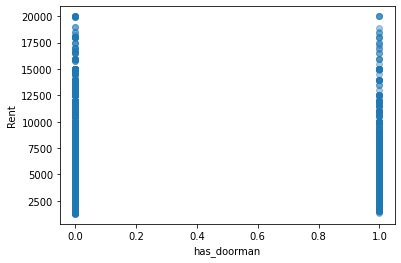

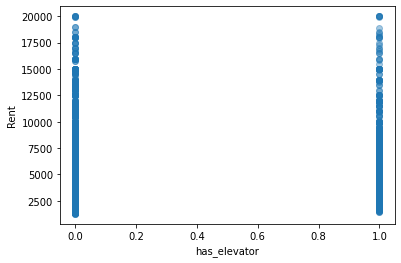

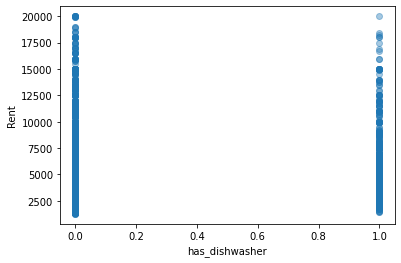

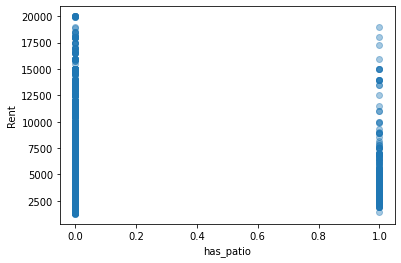

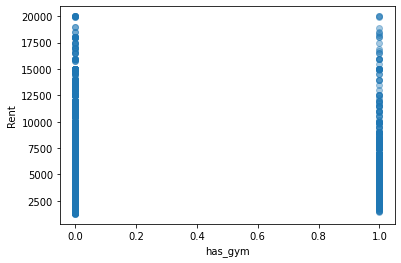

<Figure size 432x288 with 0 Axes>

In [36]:
for var in independent_vars:
    plt.scatter(df[[var]],df[['rent']],alpha = 0.4)
    plt.xlabel(var)
    plt.ylabel('Rent')
    plt.show()
    plt.clf()

In [40]:
#we reinvestigate the model with fewer independent variables: 
independent_vars2 = df.columns.values[3:6]
x2 = df[independent_vars2]

In [41]:
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,train_size=0.8,test_size=0.2)

In [42]:
mlr2 = LinearRegression()

In [43]:
mlr2.fit(x2_train,y_train)

LinearRegression()

In [44]:
mlr2.coef_

array([[-572.44571594, 1605.68322723,    4.61440601]])

In [45]:
mlr2.intercept_

array([-1050.41215969])

In [46]:
df.corr()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.005627,-0.142801,-0.035035,-0.106741,-0.080647,0.009344,-0.095590,0.047474,0.036605,-0.034081,-0.072351,-0.066153,-0.070506,-0.036664,-0.008090,-0.032547
building_id,-0.005627,1.000000,-0.001235,0.007502,-0.014055,-0.002570,-0.059641,0.015090,-0.036225,-0.019666,0.007928,0.000589,0.027252,0.018778,0.026607,-0.005895,0.016330
rent,-0.142801,-0.001235,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,-0.035035,0.007502,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,-0.106741,-0.014055,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,-0.080647,-0.002570,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.009344,-0.059641,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,-0.095590,0.015090,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,0.047474,-0.036225,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,0.036605,-0.019666,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797
